In [11]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

%matplotlib inline

In [3]:
df = pd.read_csv("/home/paul/Mindscope/Learn/projects/Kaggle-projects/shopping_trends/datasets/shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2480,2481,61,Male,Socks,Clothing,91,Ohio,XL,Maroon,Summer,2.9,No,Next Day Air,No,No,7,Credit Card,Fortnightly
382,383,28,Male,Jeans,Clothing,76,California,M,Peach,Winter,3.2,Yes,Store Pickup,Yes,Yes,47,PayPal,Quarterly
2158,2159,19,Male,Gloves,Accessories,84,Massachusetts,XL,Olive,Spring,4.6,No,Standard,No,No,9,Bank Transfer,Fortnightly
579,580,58,Male,Sandals,Footwear,41,California,M,Violet,Winter,3.7,Yes,Free Shipping,Yes,Yes,48,Credit Card,Annually
458,459,47,Male,Shorts,Clothing,91,Arkansas,L,Black,Winter,4.0,Yes,2-Day Shipping,Yes,Yes,48,PayPal,Monthly


In [4]:
df.shape

(3900, 18)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
df.duplicated().sum()

0

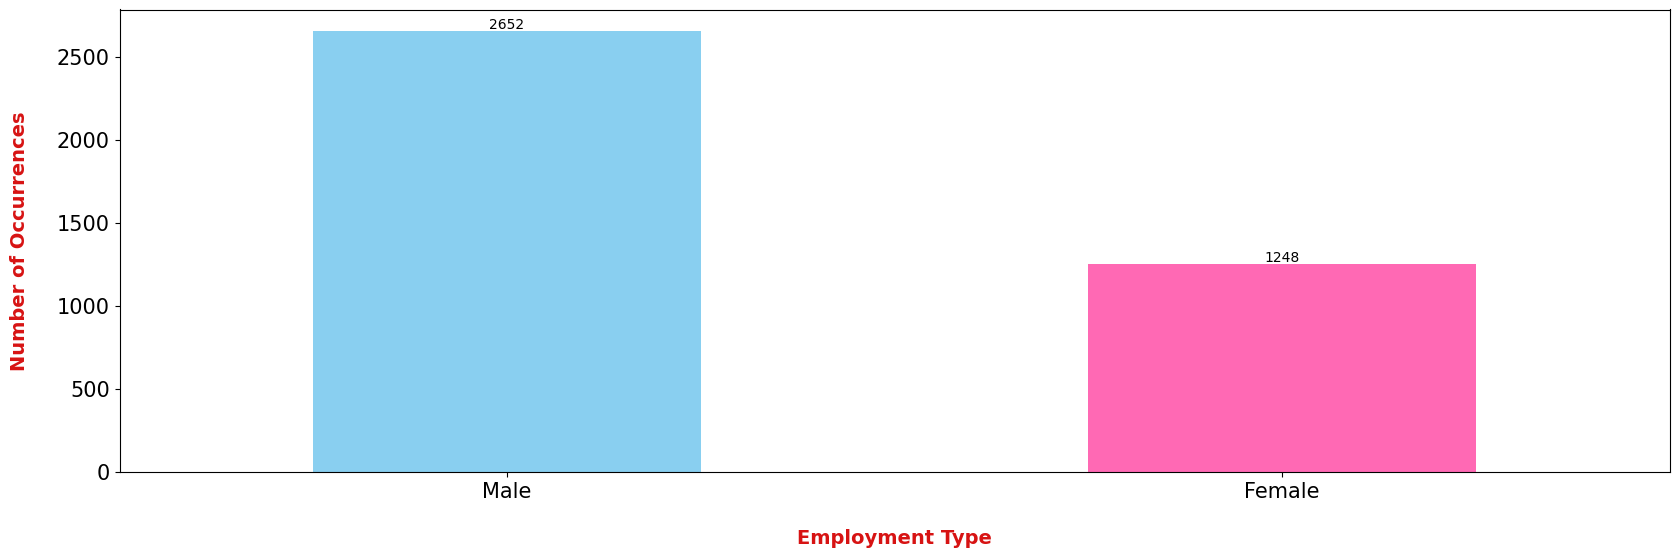

In [12]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

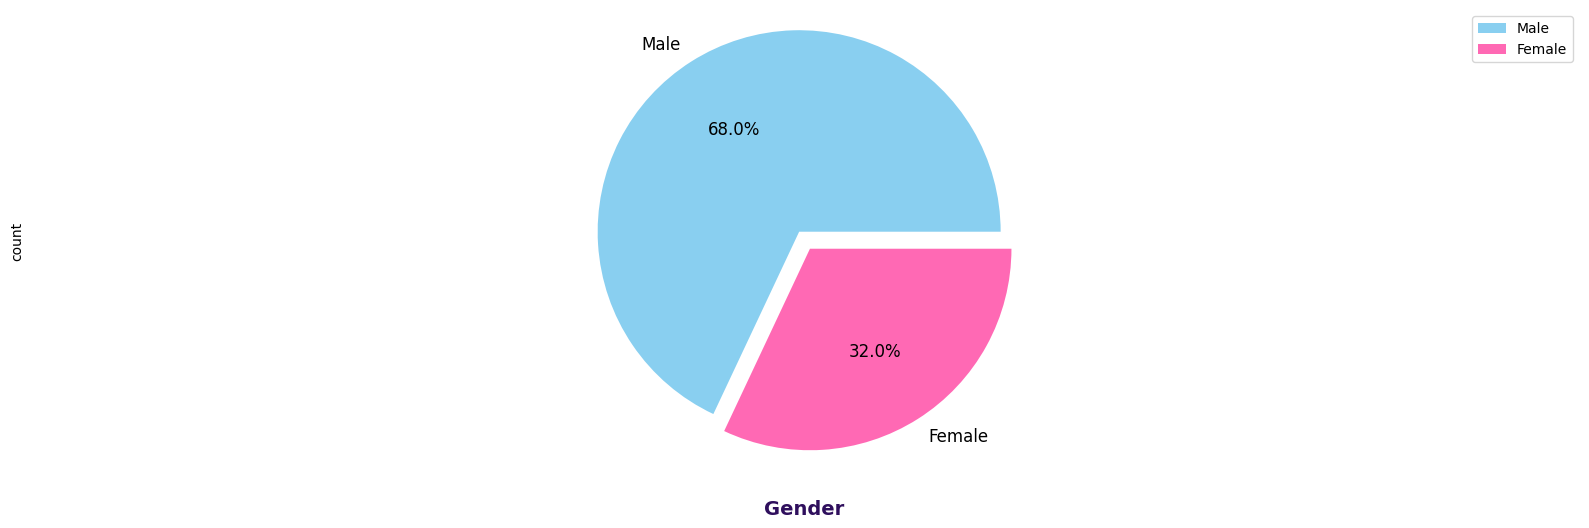

In [13]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

ModuleNotFoundError: No module named 'scipy'

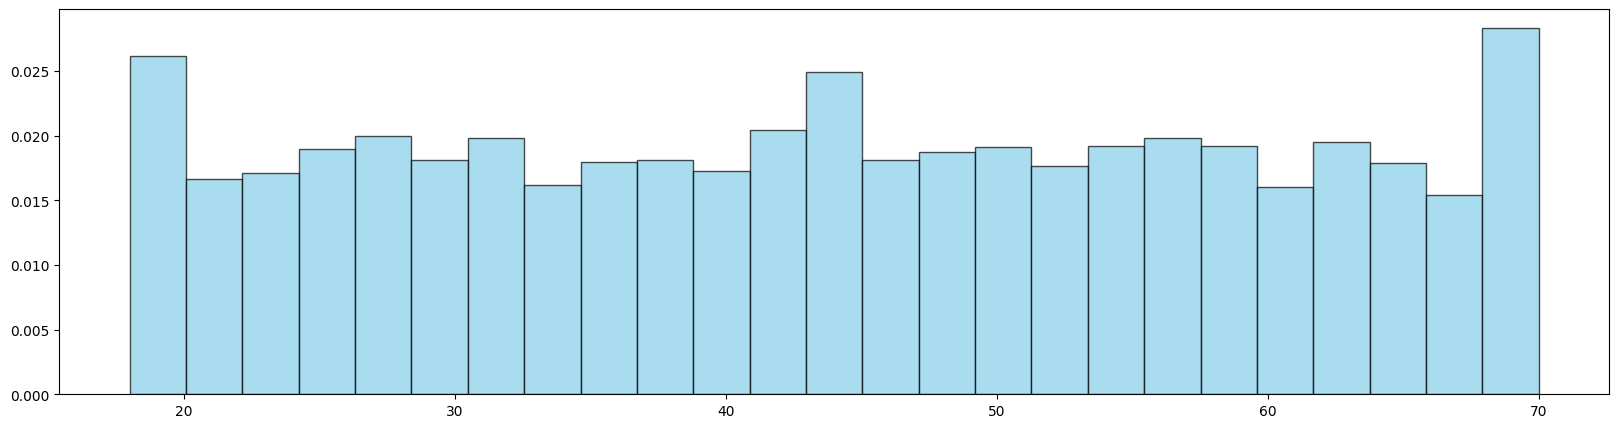

In [14]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()



In [15]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

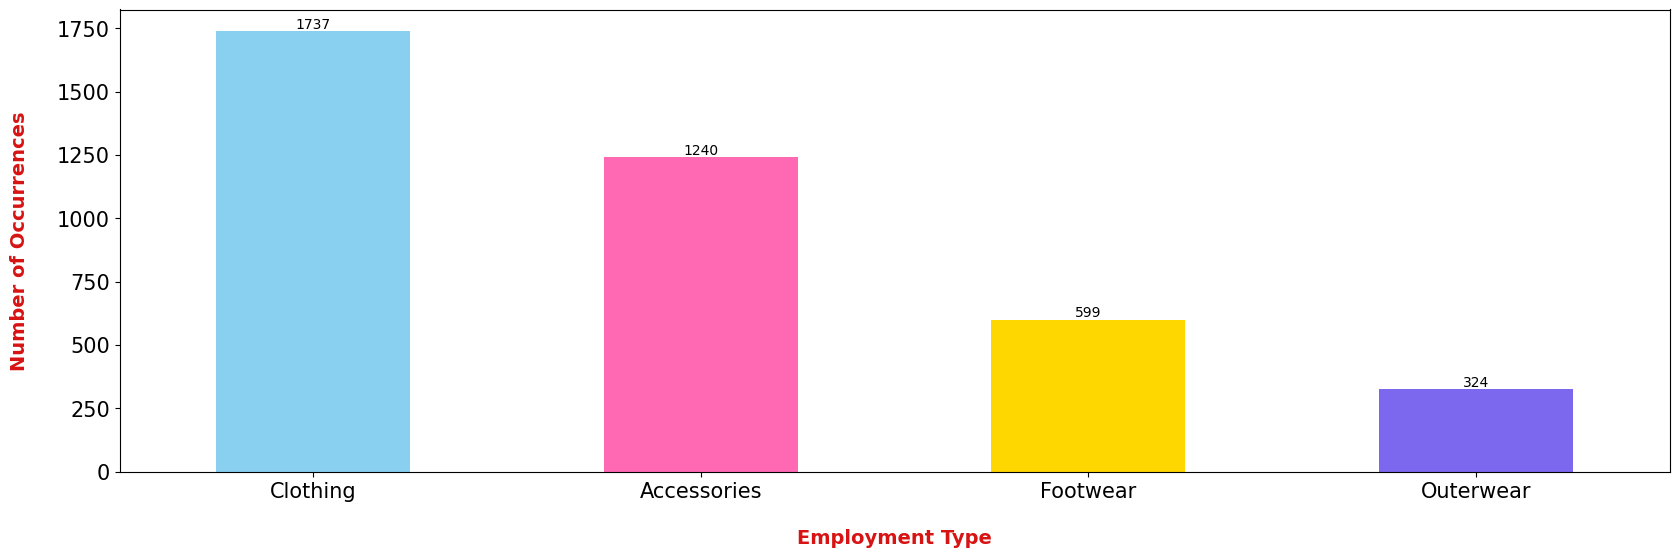

In [16]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

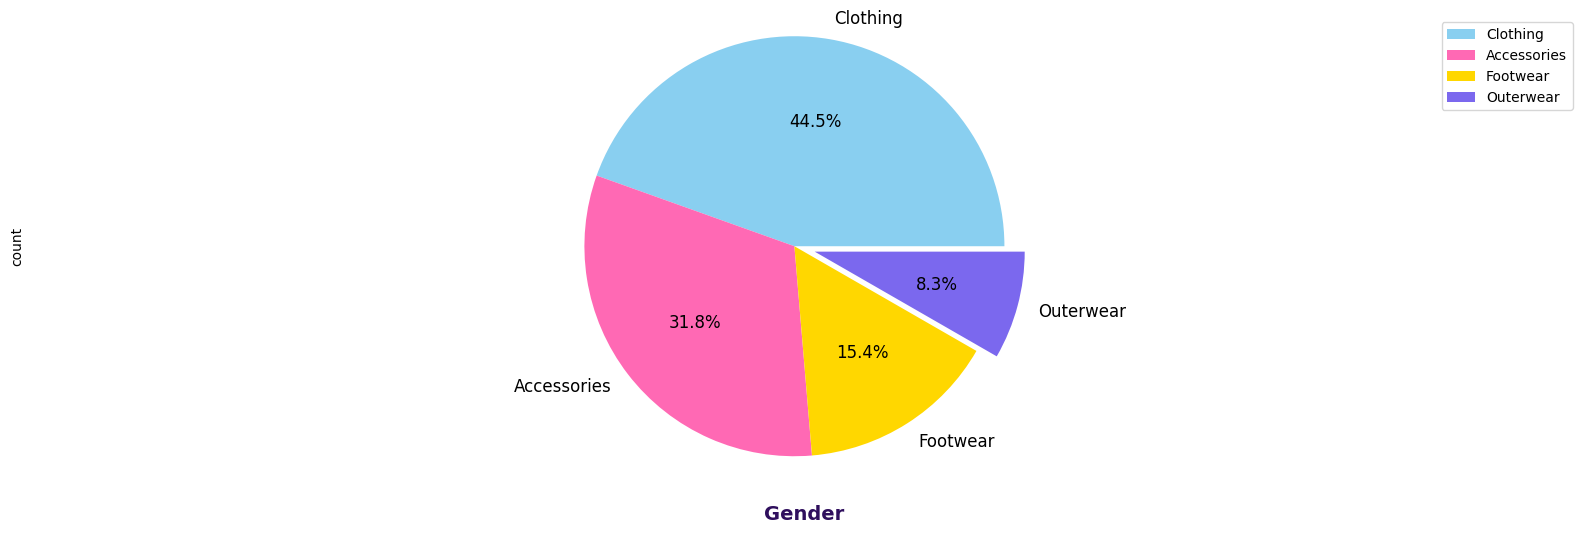

In [17]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [18]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

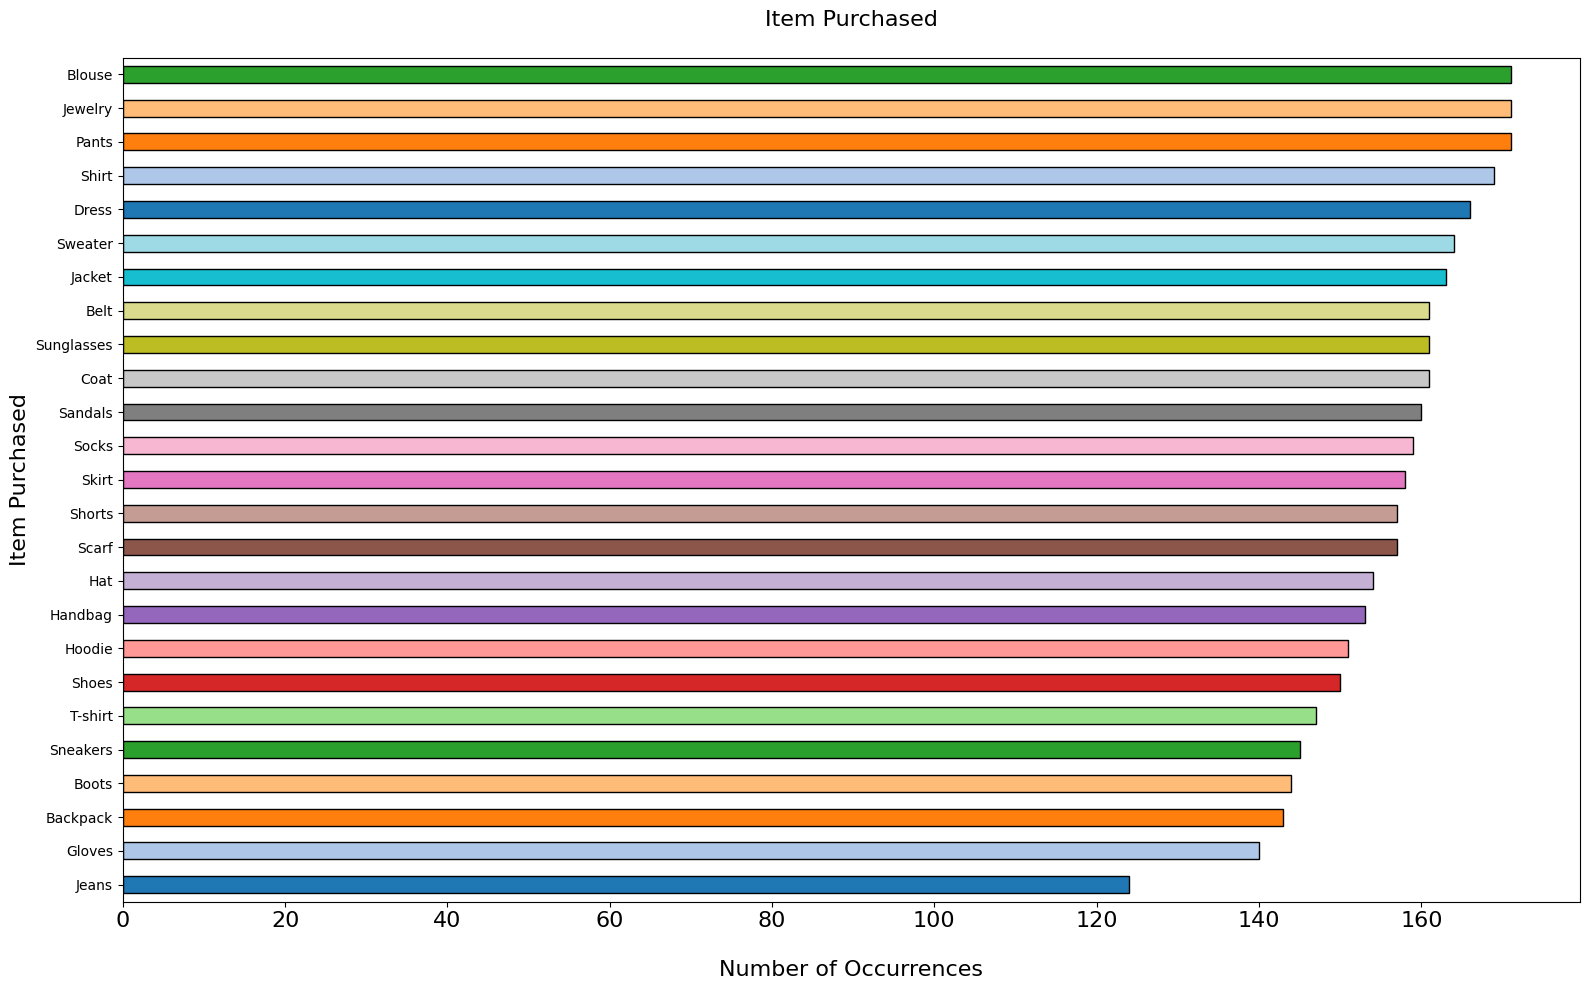

In [21]:
plt.figure(figsize = (16, 10))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [22]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

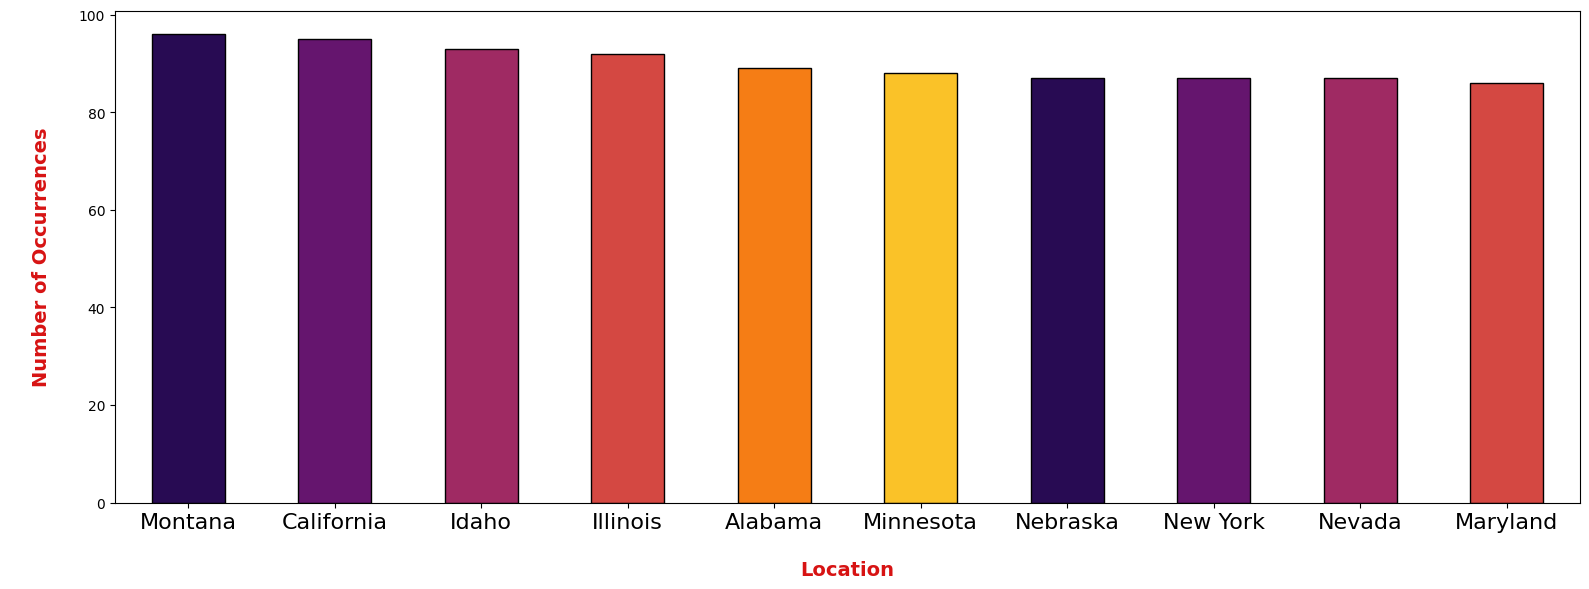

In [23]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [24]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

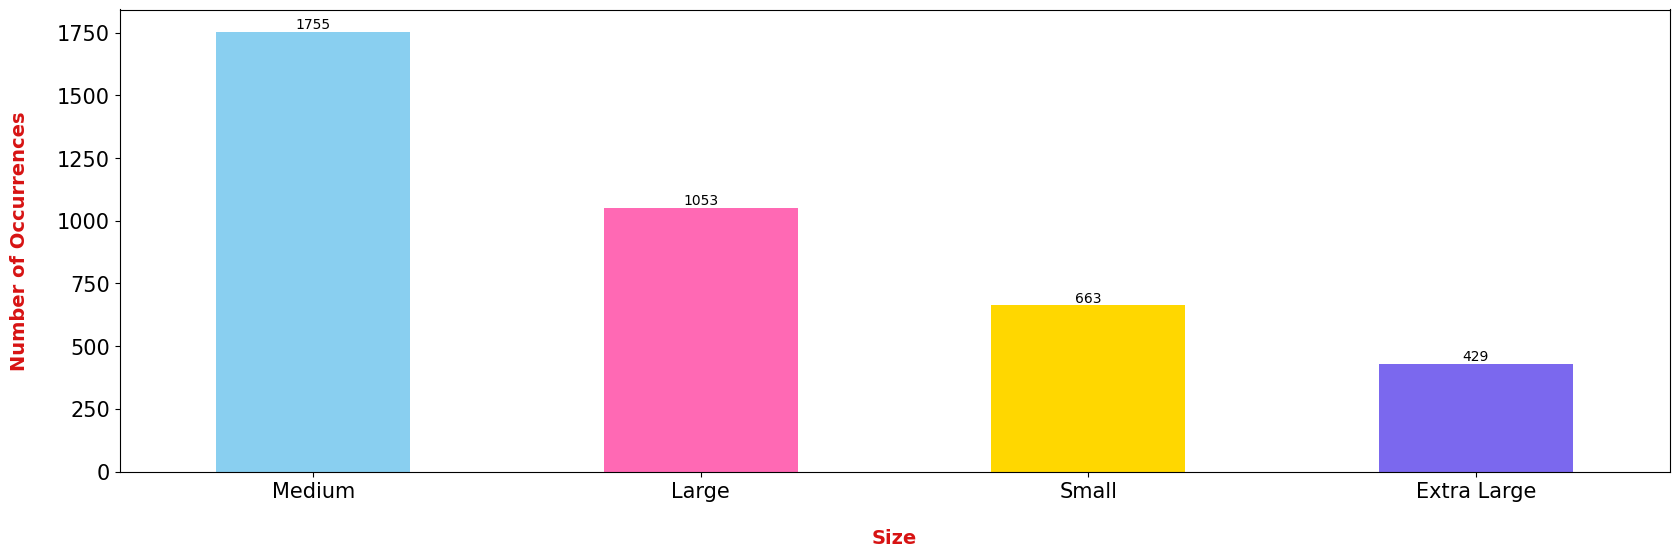

In [25]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

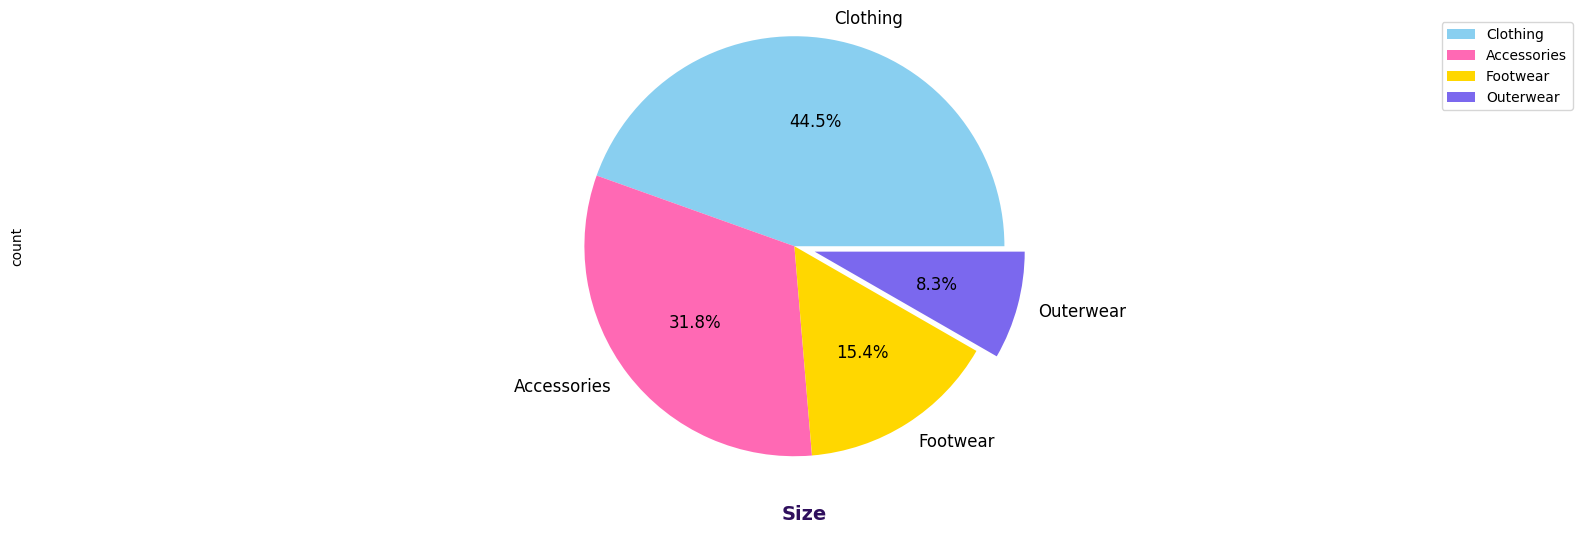

In [26]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [27]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

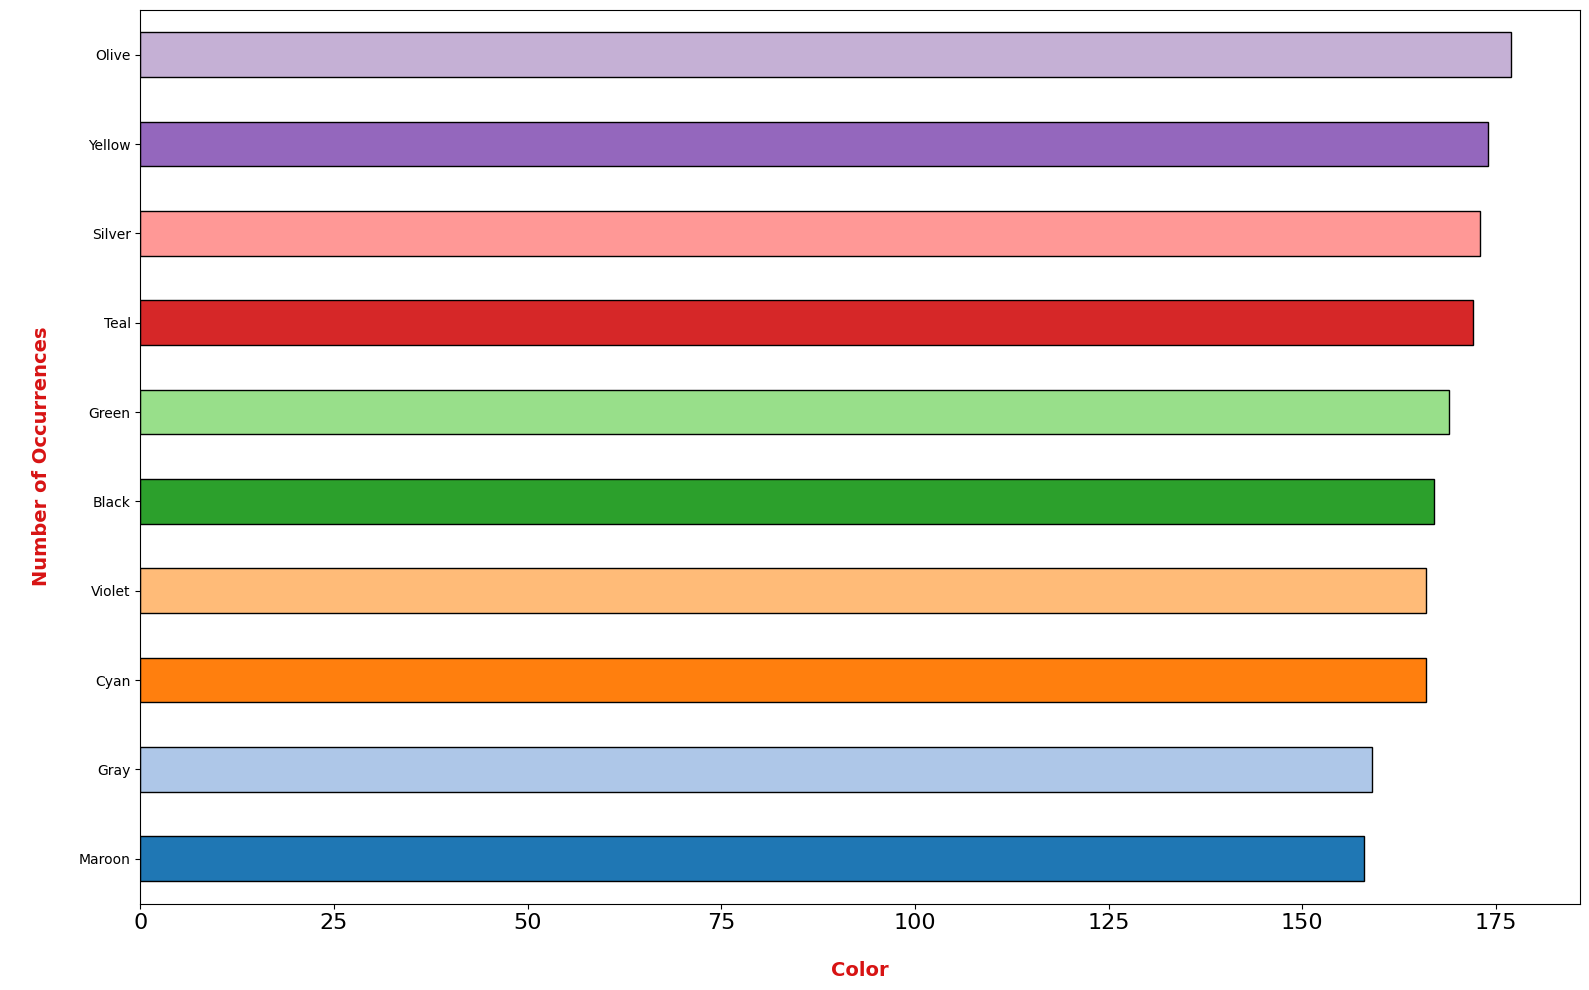

In [28]:
plt.figure(figsize = (16, 10))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [29]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

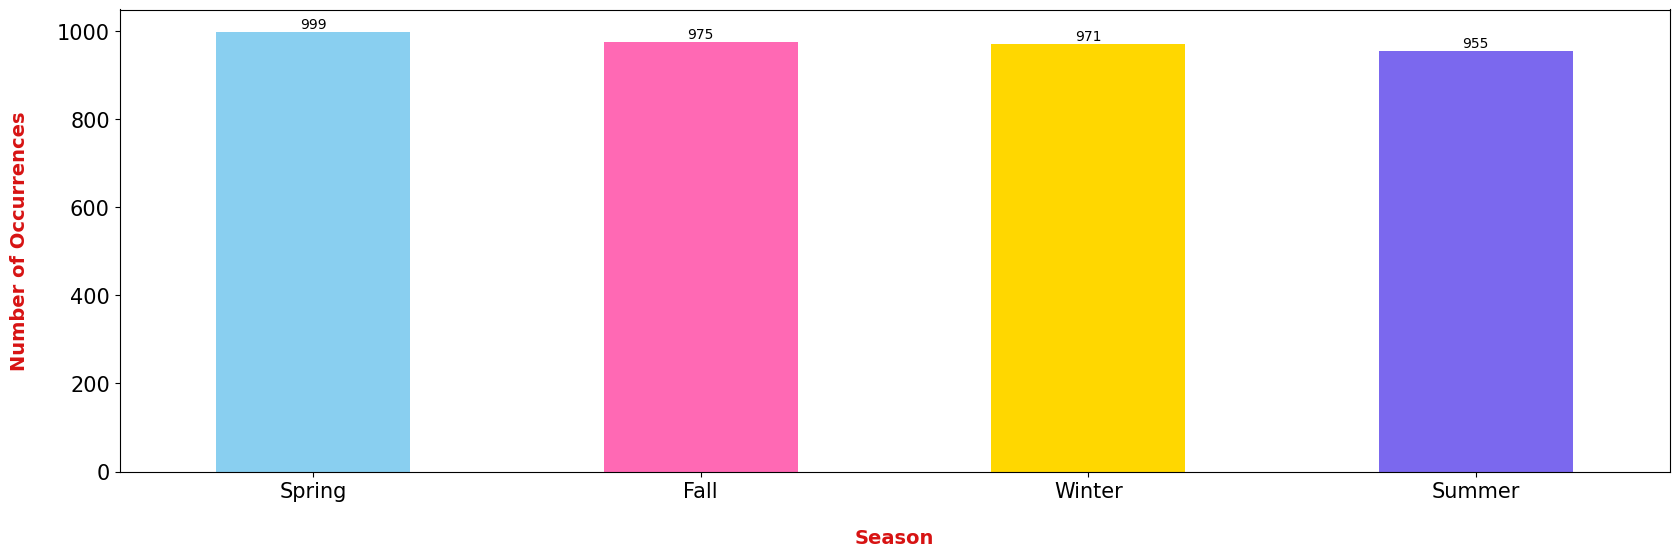

In [30]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

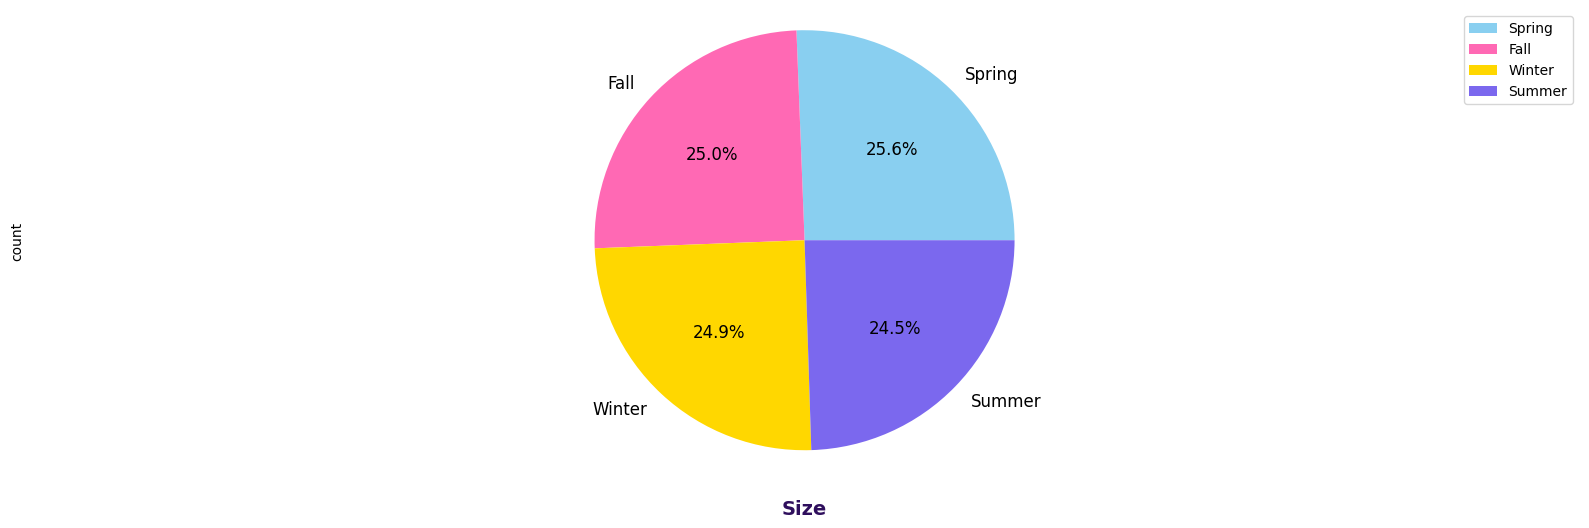

In [31]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [32]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

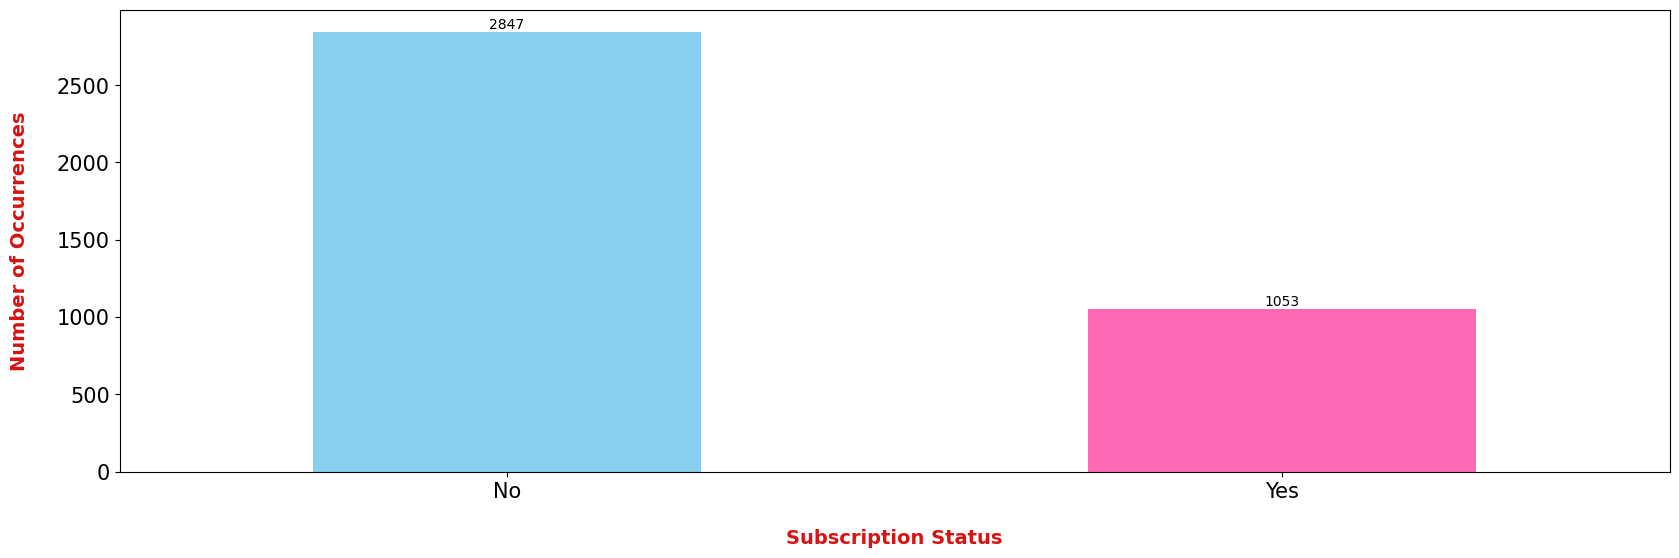

In [33]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

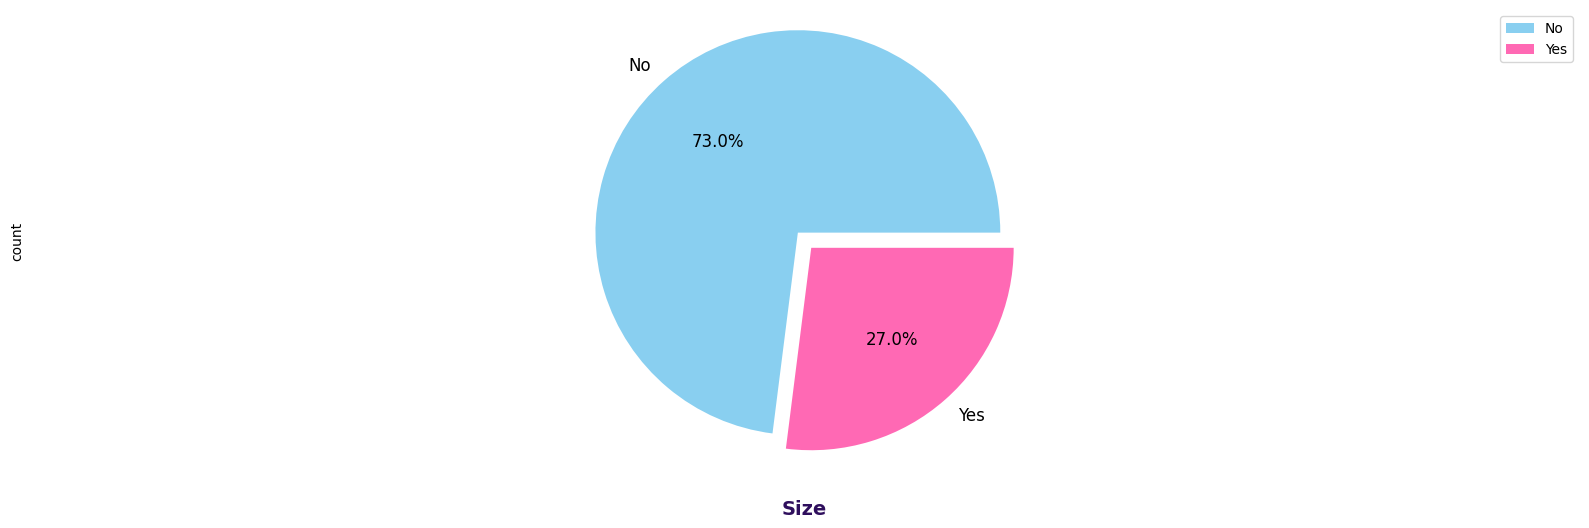

In [34]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [35]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

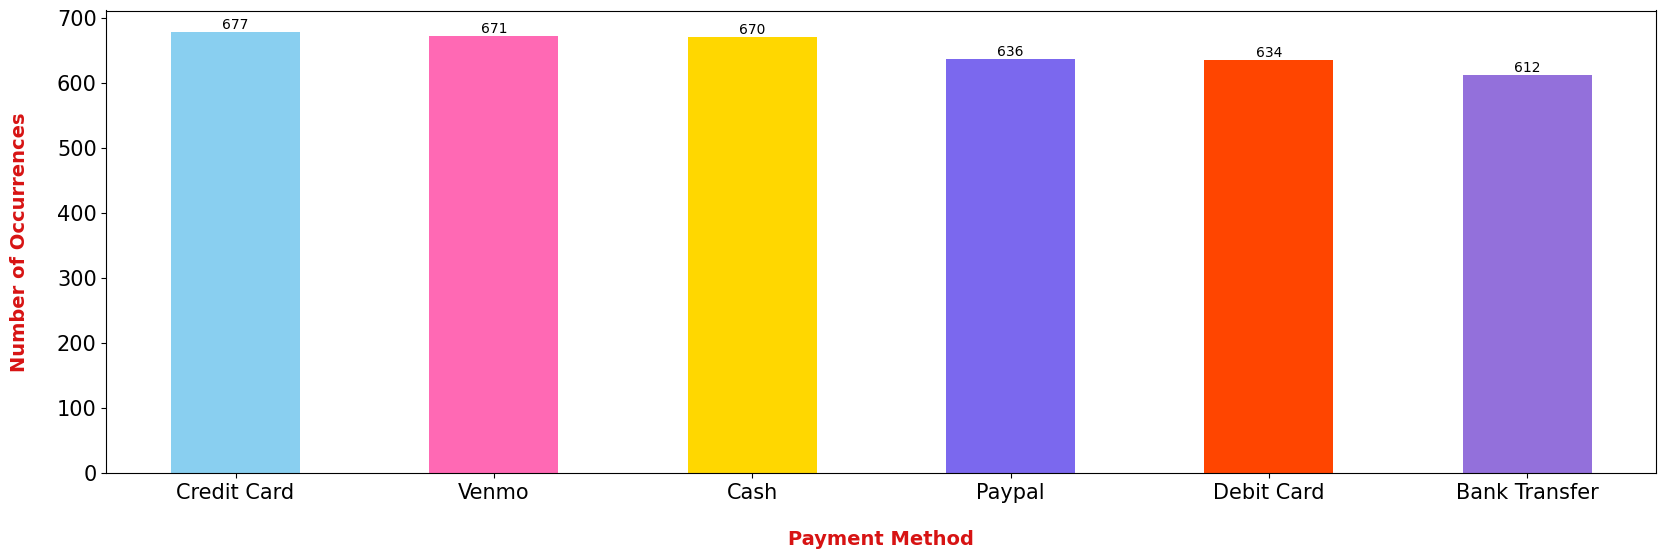

In [36]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

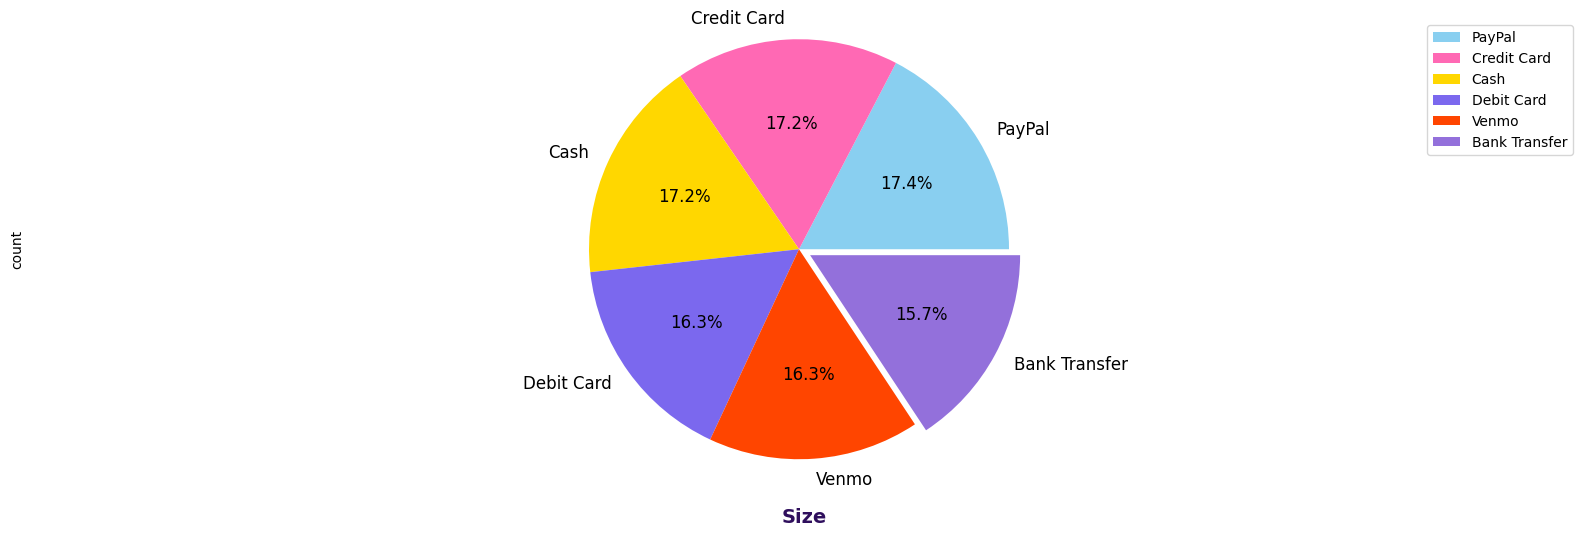

In [37]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [38]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

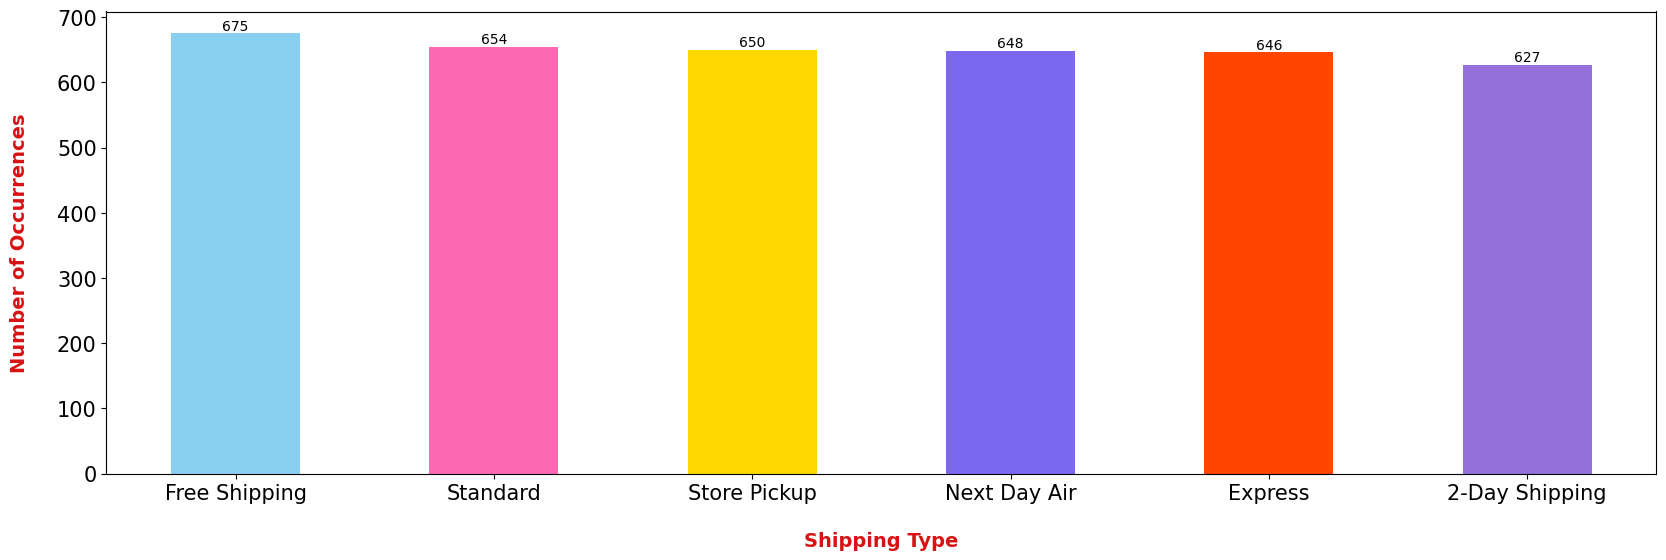

In [39]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

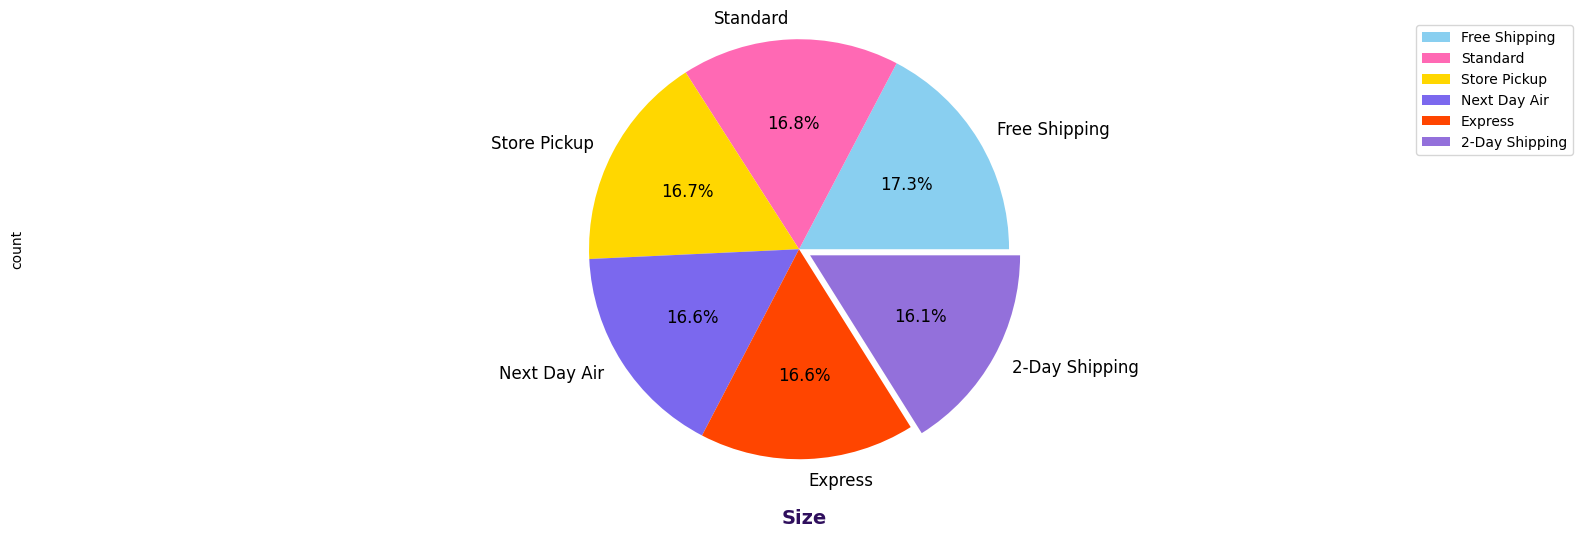

In [40]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()